In [1]:
%matplotlib inline 

In [2]:
#I imported stuff that at the end didn't use...
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#### Here we define the corresponding dictionaries containing the information of the pulses

In [3]:
Rabi={
    'Amplitude' : 4 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 0,
    'End time': 0,
}
# Maybe I should just rename this Pump, since from its form right now it doesn't the dynamics of the states are far from clear
#I dont really use End time for the this pulse since I am not sweeping it

In [4]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 5 ,
    'Start time' : 0,
    'End time': 20,
}

In [5]:
Probe2={
    'Amplitude' : 3 ,
    'Start Duration' : 9,
    'End Duration': 20 ,
    'Start time' : 0,
    'End time': 5,
}

#I mainly used this one to check on other initial conditions without having to rename everything so often, maybe I should implement
#the classes as you suggested me

### Pulse function and Sweeping:

In [5]:
def Pl(Pulse,t):
    """Primitive rectangular pulse, A corresponds to the amplitude of the pulse, t should be evaluated over the array of time"""
    """given by the points starting at Start time, through the duration given by Start Duration """
    
    pul= Pulse['Amplitude']* (  Pulse['Start time'] <=  t <= Pulse['Start Duration'] + Pulse['Start time'] )
   
    return pul

In [6]:
def genSweep(Pulse1,Pulse2,time,dt):
    "Generates the two pulses: Pulse 1 and Pulse 2, Pulse2 will be swept"
    "in the interval [0, Endtime] with a time step given by dt, "
    plu1=np.array([Pl(Pulse1,t) for t in time])
    for i in range(Pulse2['Start time'], Pulse2['End time']+dt,dt): #it is kind of ambiguos to define the sweeping interval in this way I think...
        plu2=np.array([ Pl(Pulse2,(t-i)) for t in time])
        pulss= np.add(plu1,plu2)
    return pulss
        
    
    

In [7]:
#the time interval to evaluate the pulses and make the corresponding plot
trog=np.linspace(-1,50,1000)

In [8]:
#Evaluating the corresponding function over the time interval trog with Rabi and Probe 1 pulses, with a sweeping step dt=1
ar=genSweep(Rabi,Probe1,trog,1)

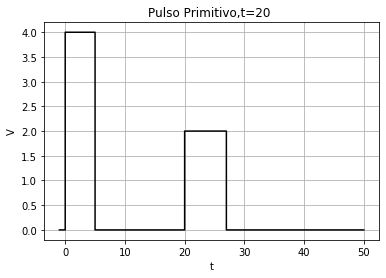

In [10]:
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
#plt.plot(t, P_raa, '-g')
#plt.plot(t,P_proo,'-r')
#plt.step(trtr,reer,'-r')
#plt.plot(time,huhh,'-b')
plt.step(trog,ar,color='Black')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo,t=20 ')

fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

This Plot corresponds to the last iteration of the sweep function, where the Probe1 pulse "went" from t=0 to t=20, given by the information within it's dictionary

Function works fine, but there is a caviet when during the sweeping while using short sweeping intervals, most probably has to do with the definiition of the sweeping range with the range() function.
Maybe it would be a good idea to separate the initial position from the sweeping range, since now both of them are given by Pulse['Start time'] , or add an if at the beginin for those cases where there is no sweeping...

### Rework!

Parameters within the dictionaries should not be addressed!, rather, from a function calculate everything!
N= number of points, Deltat

In [14]:
Rabi={
    'Amplitude' : 4 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 0,
    'End time': 0,
}
# Maybe I should just rename this Pump, since from its form right now it doesn't the dynamics of the states are far from clear
#I dont really use End time for the this pulse since I am not sweeping it

In [15]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 5 ,
    'Start time' : 0,
    'End time': 20,
}

In [16]:
Pulses_List=[Rabi,Probe1]

In [17]:
Pulses_List[0]['Amplitude']

4

In [27]:
for i in range(0,len(Pulses_List)):
    print(Pulses_List[i]['Amplitude'])

4
2


In [38]:
def Pl(Pulses,t):
    pul=np.zeros(len(Pulses))
    for i in range(0,len(Pulses)):
        pul[i]+= Pulses[i]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[i]['Start Duration'] + Pulses[i]['Start time'] )
        return pul

In [54]:
probo=np.array([Pulses[i]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[i]['Start Duration'] + Pulses[i]['Start time'] ) for i in range(0,len(Pulses_List))])

NameError: name 'Pulses' is not defined

In [28]:
def Pl(Pulses,t):
    pul=np.array[ Pulses[i]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[i]['Start Duration'] + Pulses[i]['Start time'] ) for i in range(0,len(Pulses)) ]

In [23]:
len(Pulses_List)

2

In [39]:
Prueba=np.array([Pl(Pulses_List,t) for t in trog])

In [40]:
Prueba

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [52]:
Prueba[700]

array([0., 0.])

In [11]:
trog=np.linspace(-1,50,1000)

Text(0.5, 1.0, 'Pulso Primitivo, Listas ')

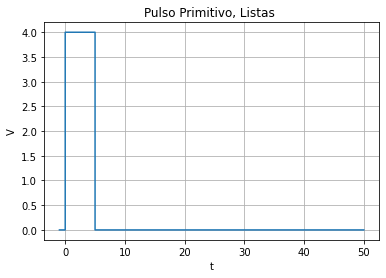

In [21]:
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
plt.step(trog,Prueba)
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo, Listas ')

#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')